# Classical & Nonlinear Dynamics

This a a work through of a selection of the problems for <i>Computational Problems for Physics</i> by Paez and Landau.

The first section will be dealing with nonlinear oscillations which are tackled with the numerical solutions for solving ODEs. In the case of my programming, it will be using the 4th Order RK method that I wrote.


In [1]:
# Import the rk4 method from a different file
import os, sys
SCRIPT_DIR = os.path.dirname(os.path.abspath('C:/Users/Dylan/OneDrive/Documents/Coding/LearningNumericalMethods/Chapter 3/Classical_and_Nonlinear_Dynamics.ipynb'))
sys.path.append(os.path.dirname(SCRIPT_DIR))
from RungeKutta.rk4Algo import dsbRK4
from IPython import display

## 3.2.1 First a Linear Oscillator

<b>Question 2</b>: Do a number of things to check that your ODE solver is working well and that you know the proper integration step size needed for high precision

a. Choose initial conditions corresponding to a frictionless oscillator initially at equilibrium, for which the analytic solution is:

\begin{equation}
    x(t) = A\sin(\omega_0 t), \quad v(t) = \omega_0 A \cos(\omega_0 t), \quad \omega_0 = \sqrt{(k/m)}
\end{equation}

b. Pick values of $k$ and $m$ such that the period $T = 2π/ω = 10$.

c.  Start with a time step size $h = T /5$ and make h smaller until the solution looks smooth, has a period that remains constant for a large number of cycles, and agrees with the analytic result. As a general rule of thumb, we suggest that you start with $h = T /100$, where T is a characteristic time for the problem at hand. You should start with a large h so that you can see a bad solution turn good.

d. Make sure that you have exactly the same initial conditions for the analytic and numerical solutions (zero displacement, nonzero velocity) and then plot the two solutions together. Also make a plot of their difference versus time since graphical agreement may show only 2–3 places of sensitivity.

e. Try different initial velocities and verify that a harmonic oscillator is isochronous, that is, that its period does not change as the amplitude is made large


<b> Answers for Q2</b>
<i>
The initial conditions that need to be chosen are $x(0) = 0$ and $v(0) = \omega_0 A$. Instead of picking a $k$ and $m$ value seperately, I'll set the value for $\omega_0 = 2\pi/10$

Below is the code solving the SHO with these intial conditions

</i>

In [2]:
import numpy as np
w0 = (2*np.pi)/10
A = 1

def g(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...
    v[0] = y[1]
    v[1] = - (w0*w0)*y[0]

    return v

s = dsbRK4([0, w0*A], g, 2, 5000, 10/1000)

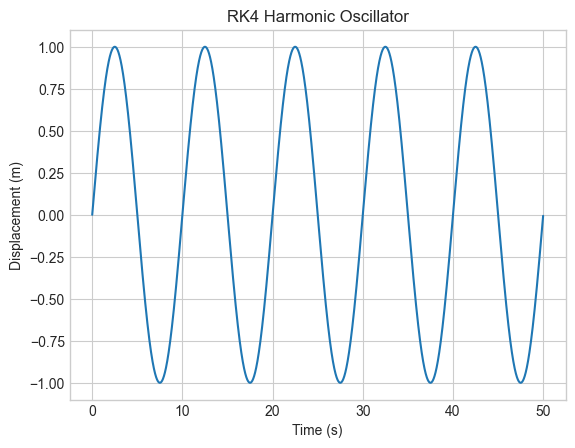

In [3]:
#Here we are graphing the results of the rk4 method solving the differential equation of the oscillation

import matplotlib.pyplot as plt

yrk4 = s[0][0]
t = s[1]

plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(t, yrk4)
plt.title('RK4 Harmonic Oscillator')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.show()

We now want to plot the analytical solution to the SHO and also graph the difference between the analytical solution and the numerical solution.

In [4]:
yA = np.zeros(t.size)

for i in range(0, yA.size):
    yA[i] = A*np.sin(w0*t[i])

yerror = yrk4-yA


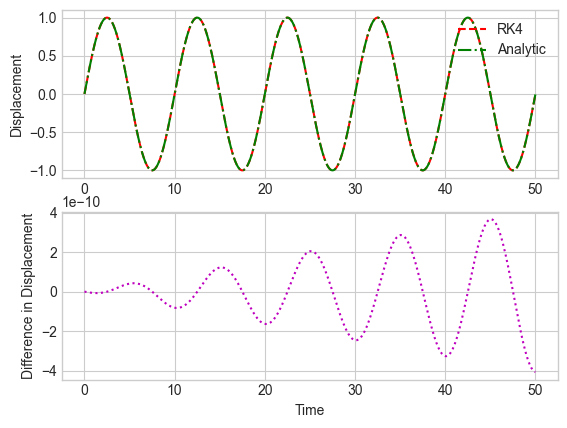

In [5]:
figure, axis = plt.subplots(2, 1)

axis[0].plot(t, yrk4, 'r--', label = 'RK4')
axis[0].plot(t, yA, 'g-.', label = 'Analytic')
axis[0].set_ylabel('Displacement')
axis[0].legend(loc='upper right')

axis[1].plot(t, yerror, 'm:')
axis[1].set_ylabel('Difference in Displacement')

plt.xlabel('Time')
plt.show()

Finally, it is easy to show that the oscillation is isochronous (constant period/frequency) with varying amplitudes by changing the initialization of the amplitude variable at the beginning of the section.

# 3.2.2 Nonlinear Oscillators

Let's now consider nonlinear oscillators of the form

\begin{equation}
    F_k(x) + F_{ext}(x,t) = m\ddot{x}
\end{equation}

where $F_k(x)$ is the restoring force of the spring and $F_{ext}(x,t)$ is a time-dependent driving force (<i>Interpret this like a hand applying some force to the block on a spring</i>).

Two models for nonlinear oscillations are described in the text:

\begin{align}
    V(x) \simeq \frac{1}{2}kx^2 \left( 1-\frac{2}{3} \alpha x \right), \qquad \text{Model 1} \\
    V(x) = \frac{1}{p}kx^p, \qquad \text{Model 2 ($p$ even)}
\end{align}

Model 1 introduces a small perturbative nonlinear term $\alpha x$. If $\alpha x \ll 1$, then the system would exhibit SHM (<i>this makes sense because the nonlinear term would be very small in comparison to the terms that make the normal SHO</i>).

Model 2 is just proportional to an arbitrarly even $p$ value so that the force can still be a restoring force.

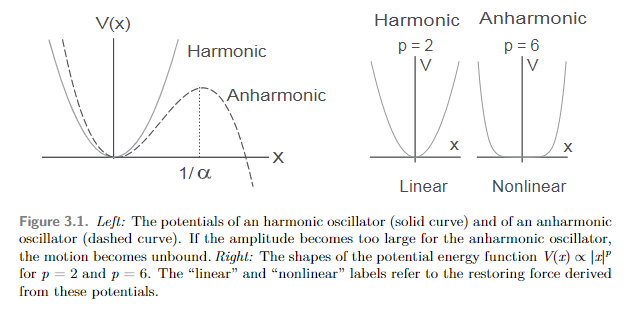

In [6]:
display.Image("../images/harmonic_vs_anharm.png")

<b>Question 3</b>

a. Modify your harmonic oscillator program to study anharmonic oscillations for strengths in the range 
\begin{equation} 
    0 \leq \alpha x \leq 2 
\end{equation}
Do not include any explicit time-dependent forces yet.

b. Test that for $\alpha = 0$ you obtain simple harmonic motion.

c. Check that the solution remains periodic as long as $x_{max} < 1/\alpha$ in model 1 and
for all initial conditions in model 2.

d. Check that the maximum speeds always occur at $x = 0$ and that the velocity
vanishes at the maximum $x$’s.

e. Verify that nonharmonic oscillators are nonisochronous, that is, that vibrations with different amplitudes have different periods

f. Describe how the shapes of the oscillations change for different $\alpha$ or $p$ values.

<b>Answers to Q3</b>

Firstly, the models described above need to coded. To this, we can write the equation of motion for either model simply as

\begin{equation}
    -\frac{dV}{dx} = m\ddot{x}
\end{equation}

where $F_k = -\tfrac{dV}{dx}$ and $F_{ext}(t) = 0$. This gives our two models 

\begin{align*} 
    \ddot{x} = \omega_0^2 \left(-x+\alpha x^2\right) \qquad \text{Model 1} \\\\
    \ddot{x} = \omega_0^2 x^{p-1}, \qquad \text{Model 2}
\end{align*}


In [7]:
def model1(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    alpha = 0.54

    v[0] = y[1]
    v[1] = -(w0*w0)*(y[0]-alpha*y[0]*y[0])

    return v

def model2(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    p = 8

    v[0] = y[1]
    v[1] = - (w0*w0)*(y[0]**(p-1))

    return v

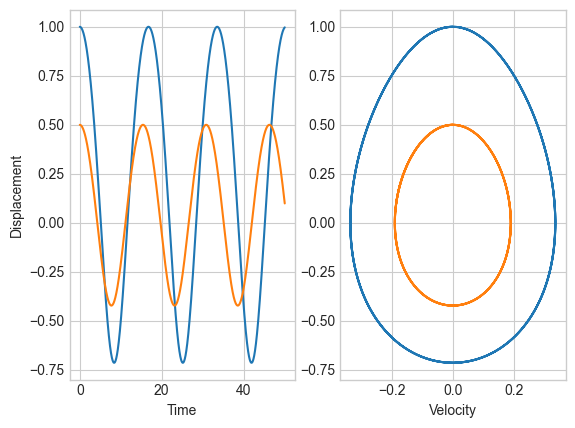

In [8]:
w0 = (2*np.pi)/15

#Finding the space time array using the first model of the nonlinear harmonics oscillator. The amplitude is defined by the inital conditions of the differential equation
s1 = dsbRK4([1, 0], model1, 2, 5000, 10/1000)
s1_A2 = dsbRK4([0.5, 0], model1, 2, 5000, 10/1000)

fig, ax = plt.subplots(1, 2)

ax[0].plot(s1[1], s1[0][0])
ax[0].plot(s1_A2[1], s1_A2[0][0])
ax[0].set_ylabel("Displacement")
ax[0].set_xlabel('Time')

ax[1].plot(s1[0][1], s1[0][0])
ax[1].plot(s1_A2[0][1], s1_A2[0][0])
ax[1].set_xlabel('Velocity' )

plt.show()

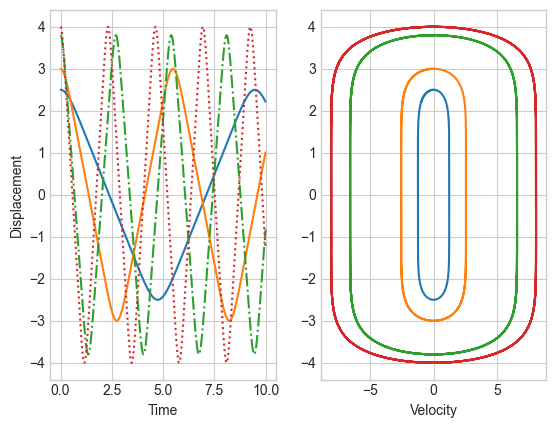

In [9]:
w0 = (2*np.pi)/100

#Finding the space time array using the first model of the nonlinear harmonics oscillator. The amplitude is defined by the inital conditions of the differential equation
s2_A1 = dsbRK4([2.5, 0], model2, 2, 10000, 1/1000)
s2_A2 = dsbRK4([3, 0], model2, 2, 10000, 1/1000)
s2_A3 = dsbRK4([3.8, 0], model2, 2, 10000, 1/1000)
s2_A4 = dsbRK4([4, 0], model2, 2, 10000, 1/1000)

fig, ax = plt.subplots(1, 2)

ax[0].plot(s2_A1[1], s2_A1[0][0])
ax[0].plot(s2_A2[1], s2_A2[0][0])
ax[0].plot(s2_A3[1], s2_A3[0][0], '-.')
ax[0].plot(s2_A4[1], s2_A4[0][0], ':')
ax[0].set_ylabel("Displacement")
ax[0].set_xlabel('Time')

ax[1].plot(s2_A1[0][1], s2_A1[0][0])
ax[1].plot(s2_A2[0][1], s2_A2[0][0])
ax[1].plot(s2_A3[0][1], s2_A3[0][0])
ax[1].plot(s2_A4[0][1], s2_A4[0][0])
ax[1].set_xlabel('Velocity' )

plt.show()

From the code above, it is easy to see the desired behavior for parts b-f of Q3.

In particular, it is obvious from the phase portraits the max velocities occur at equilibrium and zero velocity occurs at the amplitudes. Similarly, 